Function to read f_27 file

In [128]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [159]:
def mean_position_opta_f27(xml_file):
    ''''
    Function that returns a dataframe with all players found in a F27 file, together with
    its mean position based on contacts with ball and tje number of sucessful passes

    Input:
    OPTA F27 xml file


    '''

    import xml.etree.ElementTree as ET
    import pandas as pd

    file = ET.parse(xml_file)

    namelist= []
    xlist =[]
    ylist = []
    poslist = []
    pass_success_list = []

    for node in file.getroot():
        name = node.attrib.get("player_name")
        x = node.attrib.get("x")
        y = node.attrib.get("y")
        pos = node.attrib.get("position")
        pass_success = node.attrib.get("pass_success")
        namelist.append(name)
        xlist.append(x)
        ylist.append(y)
        poslist.append(pos)
        pass_success_list.append(pass_success)


    
    df=pd.DataFrame(data = list(zip(namelist,xlist,ylist,poslist, pass_success_list)),
                    columns = ["Passer","x","y","Position_Passer","PassSuccess"])

    df['x'] = pd.to_numeric(df['x'], errors='coerce')
    df['y'] = pd.to_numeric(df['y'], errors='coerce')                
    df['PassSuccess'] = df['PassSuccess'].astype(int) 
    
    return df.sort_values(by=["Position_Passer",'Passer']).reset_index(drop=True)

In [160]:
mean_position=mean_position_opta_f27('C:/Users/Felix/Desktop/Máster  BD Deporte/Módulo 7 - Proveedores de Datos Deportivos/f27/pass_matrix_23_2019_g1074821_t957.xml')
mean_position

,Passer,x,y,Position_Passer,PassSuccess
0,Dimitrios Siovas,39.64,75.41,Defender,31
1,Rodrigo Tarín,33.80,44.08,Defender,36
2,Unai Bustinza,35.79,23.62,Defender,26
3,Martin Braithwaite,66.27,44.32,Forward,9
4,Youssef En-Nesyri,68.63,56.16,Forward,9
5,Óscar Rodríguez,64.74,68.66,Forward,19
6,Iván Cuéllar,12.40,53.23,Goalkeeper,21
7,Javier Eraso,49.60,27.68,Midfielder,15
8,Jonathan Silva,56.95,90.17,Midfielder,16
9,Roberto Rosales,55.98,9.18,Midfielder,15


In [119]:
def pass_matrix(xml_file, pivot_table=False, color=False):
    ''''
    Function that returns a dataframe with all players found in a F27 file, together with
    its mean position based on contacts with ball and tje number of sucessful passes

    Input:
    OPTA F27 xml file


    '''

    import xml.etree.ElementTree as ET
    import pandas as pd

    file = ET.parse(xml_file)

    passer = []
    receiver = []
    passeslist = []

    for node in file.getroot():
        for players in node:
            passes = players.text
            name = players.attrib.get("player_name")
            passer.append(node.attrib.get("player_name"))
            receiver.append(name)
            passeslist.append(passes)


    df=pd.DataFrame(data = list(zip(passer,receiver,passeslist)),
                    columns = ["Passer","Receiver","Number of Succesful Passes"])
    df["Number of Succesful Passes"]=df["Number of Succesful Passes"].astype(int)
    
    if pivot_table==True:
    # Crear la tabla de frecuencias
        df = df.pivot_table(values='Number of Succesful Passes', index='Passer', columns='Receiver',aggfunc="sum", fill_value=0)
    
    if color==True:
        return df.style.background_gradient( axis=None)
    else:
        return df

In [163]:
pm=pass_matrix('C:/Users/Felix/Desktop/Máster  BD Deporte/Módulo 7 - Proveedores de Datos Deportivos/f27/pass_matrix_23_2019_g1074821_t957.xml')
pm

,Passer,Receiver,Number of Succesful Passes
0,Javier Eraso,Martin Braithwaite,2
1,Javier Eraso,Rubén Pérez,2
2,Javier Eraso,Unai Bustinza,3
3,Javier Eraso,Dimitrios Siovas,1
4,Javier Eraso,Rodrigo Tarín,1
...,...,...,...
94,Roberto Rosales,Youssef En-Nesyri,3
95,Roberto Rosales,Recio,1
96,Roberto Rosales,Rubén Pérez,2
97,Roberto Rosales,Unai Bustinza,4


In [142]:
test2=pass_matrix('C:/Users/Felix/Desktop/Máster  BD Deporte/Módulo 7 - Proveedores de Datos Deportivos/f27/pass_matrix_23_2019_g1074821_t957.xml',pivot_table=True)


In [154]:
def Plotter(mean_position, passer, receiver, number, num_max_pases):

    '''
    Function that plots a line between the mean position of passer and receiver
    where the width of that line is based on the number of passes that 
    take place between those two players.

    Input:
    * mean_position: dataframe with each player and its mean position
    * pass_matrix: dataframe that shows all passes between each pair of players

    '''

    mp_coords=mean_position[['Passer','x','y']].drop_duplicates()
    mp_coords=mp_coords.set_index("Passer")

    passer_loc = [[float(mp_coords.loc[passer,][0]),float(mp_coords.loc[passer,][1])]]
    receiver_loc = [[float(mp_coords.loc[receiver,][0]),float(mp_coords.loc[receiver,][1])]]

    for i,j in zip(passer_loc, receiver_loc):
        plt.arrow(x = i[0],
                  y = i[1],
                  dx = (j[0]-i[0]),
                  dy = (j[1]-i[1]),
                  linewidth = int(number),
                  alpha = (int(number)/num_max_pases), # propiedad transparencia que va de 0 a 1
                  length_includes_head=True,
                  color = "red")

In [ ]:
def opta_pitch(ax):        
    # OPTA PITCH
    # Pitch Outline & Centre Line
    plt.plot([0,0],[0,100], color="black")
    plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
    plt.plot([100,100],[100,0], color="black")
    plt.plot([100,0],[0,0], color="black")
    plt.plot([50,50],[0,100], color="black")

    # Left Penalty Area
    plt.plot([17,17],[78.9,21.1],color="black")
    plt.plot([0,17],[78.9,78.9],color="black")
    plt.plot([17,0],[21.1,21.1],color="black")

    # Right Penalty Area
    plt.plot([100,83],[78.9,78.9],color="black")
    plt.plot([83,83],[78.9,21.1],color="black")
    plt.plot([83,100],[21.1,21.1],color="black")

    # Left 6-yard Box
    plt.plot([0,5.8],[63.2,63.2],color="black")
    plt.plot([5.8,5.8],[63.2,36.8],color="black")
    plt.plot([5.8,0],[36.8,36.8],color="black")

    # Right 6-yard Box
    plt.plot([100,94.2],[63.2,63.2],color="black")
    plt.plot([94.2,94.2],[63.2,36.8],color="black")
    plt.plot([94.2,100],[36.8,36.8],color="black")

    # Prepare Circles OK
    centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
    centreSpot = plt.Circle((50,50),0.6,color="black")
    leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
    rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

    # Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    # Prepare Arcs based on penalty Spots
    leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
                theta1=310,theta2=50,color="black")
    rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")


    # Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

In [189]:
def plot_pass_meanpos(mean_position, pass_matrix, show_passes=True):

    if 'Number of Succesful Passes' not in list(pass_matrix.columns):
    # Raises an error if the input is a pivot table (not contains Number of Succesful Passes column)    
        raise ValueError("Input appears to be a pivot table. Input needs to be a regular dataframe.")
    
    fig, ax = plt.subplots(figsize=(18,14))
    
    max_num_pases=pass_matrix['Number of Succesful Passes'].max()
    # Flechas con los pases entre los jugadores con Plotter(passer, receiver, number)
    if show_passes==True:
        for i in range(len(pass_matrix)):
            Plotter(mean_position, pass_matrix.iloc[i,0], pass_matrix.iloc[i,1], pass_matrix.iloc[i,2], max_num_pases)

    # Posición Media Scatter Puntos con color en función de su demarcación
    for i in range(len(mean_position)):
        ax.text(mean_position.iloc[i,1], mean_position.iloc[i,2], s = mean_position.iloc[i,0], rotation = 45, size = 10)
        if mean_position.iloc[i,3] == "Goalkeeper":
            plt.scatter(x=mean_position.iloc[i,1], y = mean_position.iloc[i,2], s = mean_position.iloc[i,4]*40, zorder = 1, color = "blue")
        if mean_position.iloc[i,3] == "Forward":
            plt.scatter(x=mean_position.iloc[i,1], y = mean_position.iloc[i,2], s = mean_position.iloc[i,4]*40, zorder = 1, color = "green")
        if mean_position.iloc[i,3] == "Midfielder":
            plt.scatter(x=mean_position.iloc[i,1], y = mean_position.iloc[i,2], s = mean_position.iloc[i,4]*40, zorder = 1, color = "grey")
        if mean_position.iloc[i,3] == "Defender":
            plt.scatter(x=mean_position.iloc[i,1], y = mean_position.iloc[i,2], s = mean_position.iloc[i,4]*40, zorder = 1, color = "orange")
        if mean_position.iloc[i,3] == "Substitute":
            plt.scatter(x=mean_position.iloc[i,1], y = mean_position.iloc[i,2], s = mean_position.iloc[i,4]*40, zorder = 1, color = "yellow")


    opta_pitch(ax)
    

    # Quitar Ejes
    plt.axis("off")
    if show_passes==True:
        plt.title("Passmap usando fichero F27 Opta - STATS Perform")
    else:
        plt.title("Posición media usando fichero F27 Opta - STATS Perform")

    plt.show()


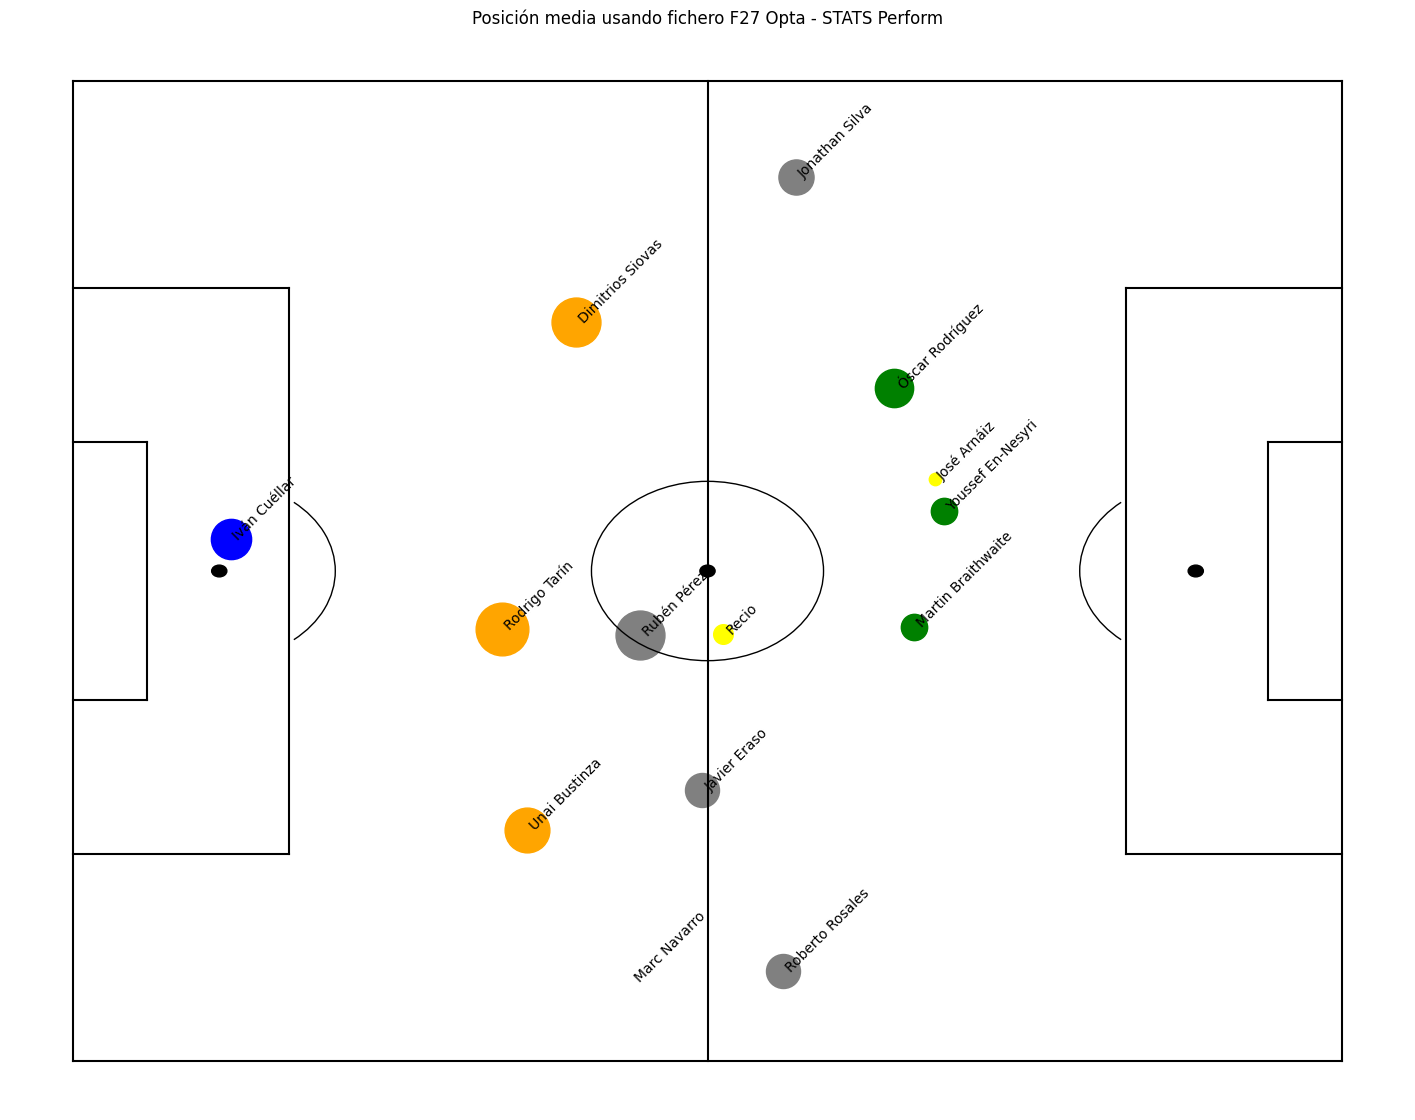

In [190]:
plot_pass_meanpos(mean_position,pm, False)